In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
def pos(x):
    
    y = x.copy()
    y[x > 0] = x[x > 0]
    y[x <=0] = 0
    
    return y

In [5]:
def final_basis_normal(i, x, h, N, x_0):
    
    if (0 <= i <= N-1):
        a =   pos((x-x_0)/h - (i - 2))**3
        b = 4*pos((x-x_0)/h - (i - 1))**3
        c = 6*pos((x-x_0)/h - (i - 0))**3
        d = 4*pos((x-x_0)/h - (i + 1))**3
        e =   pos((x-x_0)/h - (i + 2))**3

        f = 0.25 * (a - b + c - d + e)

        if i == 0:
            f += pos(1 - (x - x_0)/h)**3/4
        
        if i == (N - 1):
            f += pos((x - x_0)/h - (N-2))**3/4
        
        f[x < x_0] = 0
        f[x > (x_0 + (N - 1)*h)] = 0
        
    else:
        raise IndexError(f"Invalid index {i}")
        
    return f

In [6]:
x0 = -3
N = 10
X, h = np.linspace(x0, 3, N, retstep=True)
x = np.linspace(x0, 3, 1000)

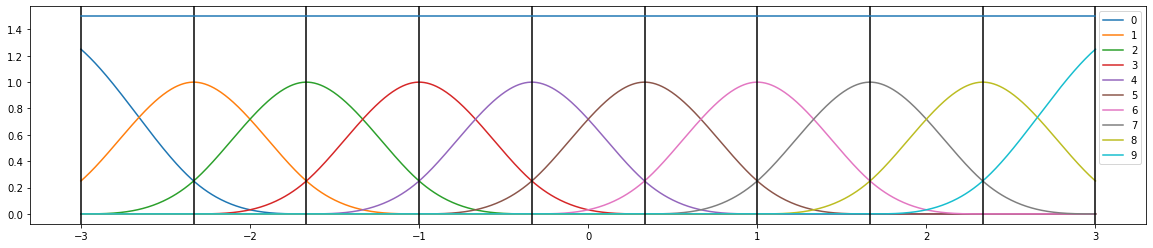

In [7]:
fig, ax = plt.subplots(figsize=(20, 4))
f = np.zeros_like(x)

for j in range(0, N):
    ax.plot(x, final_basis_normal(j, x, h, N, x0))
    f += final_basis_normal(j, x, h, N, x0)

for xx in X:
    ax.axvline(x=xx, color="black")

ax.plot(x, f)
ax.legend([f"{j}" for j in range(N)])
plt.show()

# Interpolation example

In [8]:
Y = np.sin(X)

In [9]:
n_points = X.shape[0]
matrix = np.zeros((n_points, n_points))
matrix += np.eye(n_points) + 0.25 * np.eye(n_points, k=1) + 0.25 *np.eye(n_points, k=-1)

In [10]:
matrix[+0, +0] = 1.25
matrix[-1, -1] = 1.25

In [11]:
c = np.linalg.solve(matrix, Y)

In [12]:
f_bar = np.zeros_like(x)

for j in range(n_points):
    f_bar += c[j] * final_basis_normal(j, x, h, N, x0)

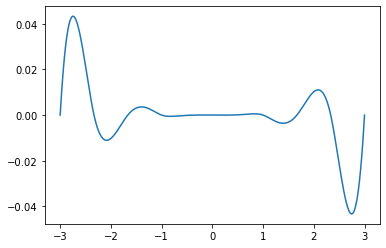

In [13]:
fig, ax = plt.subplots()
ax.plot(x, f_bar-np.sin(x))
plt.show()

# Single basis

In [14]:
IX, IY = np.meshgrid(X, X, indexing="ij")

In [15]:
IZ = np.sin(IX)*np.cos(IY)

In [16]:
xx, yy = np.meshgrid(x, x, indexing="ij")
zz = np.zeros_like(xx)

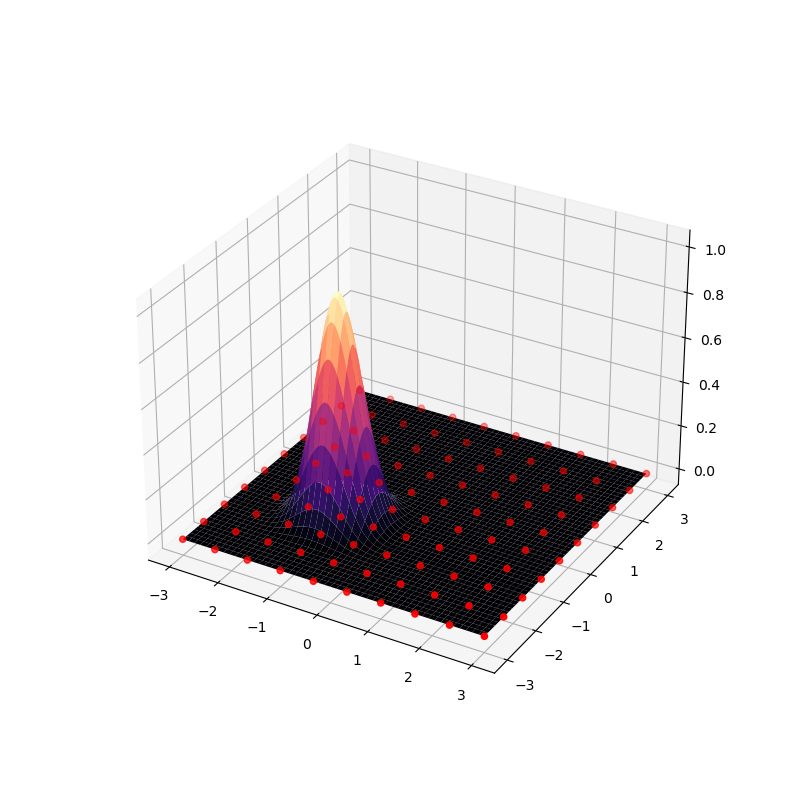

In [17]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
zz = np.outer(final_basis_normal(3, x, h, N, x0),
              final_basis_normal(3, x, h, N, x0))
ax.plot_surface(xx, yy, zz, cmap='magma')
ax.scatter(IX, IY, IZ*0, color="red")
plt.show()

In [18]:
x0 = 0
N = 10
X, h = np.linspace(x0, 3, N, retstep=True)
x = np.linspace(x0, 3, 100)

In [19]:
IX, IY = np.meshgrid(X, X, indexing="ij")
IZ = np.sin(IX)*np.cos(IY)

In [20]:
n_points = X.shape[0]
b = IZ.flatten()
matrix = np.zeros((n_points**2, n_points**2), dtype=np.float32)

In [21]:
for i in range(n_points**2):
    idx = np.unravel_index(i, (n_points, n_points))
    tmp = np.zeros((n_points, n_points))
    
    tmp[idx] = 1
    
    #Multiply edges by 1.25
    if (idx[0] == 0): 
        tmp[idx] *= 1.25
    if (idx[1] == 0):
        tmp[idx] *= 1.25
    if (idx[0] == n_points-1):
        tmp[idx] *= 1.25
    if (idx[1] == n_points-1):
        tmp[idx] *= 1.25
    
    if idx[0]+1 <= n_points-1:
        tmp[idx[0]+1, idx[1]] = 1/4
    
    if idx[1]+1 <= n_points-1:
        tmp[idx[0], idx[1]+1] = 1/4
    
    if idx[0]-1 >= 0:
        tmp[idx[0]-1, idx[1]] = 1/4
        
    if idx[1]-1 >= 0:
        tmp[idx[0], idx[1]-1] = 1/4
    
    if (idx[0]+1 <= n_points-1) and (idx[1]+1 <= n_points-1):
        tmp[idx[0]+1, idx[1]+1] = 1/16
    
    if (idx[0]+1 <= n_points-1) and (idx[1]-1 >= 0):
        tmp[idx[0]+1, idx[1]-1] = 1/16
    
    if (idx[0]-1 >= 0) and (idx[1]-1 >= 0):
        tmp[idx[0]-1, idx[1]-1] = 1/16
        
    if (idx[0]-1 >= 0) and (idx[1]+1 <= n_points-1):
        tmp[idx[0]-1, idx[1]+1] = 1/16
        
    #Multiply edge line's by 1.25
    if (idx[0] == 0) or (idx[0] == n_points - 1):
        if idx[1] + 1 <= n_points - 1:
            tmp[idx[0], idx[1] + 1] *= 1.25
        if idx[1] - 1 >= 0:
            tmp[idx[0], idx[1] - 1] *= 1.25

    if (idx[1] == 0) or (idx[1] == n_points - 1):
        if idx[0] + 1 <= n_points - 1:
            tmp[idx[0] + 1, idx[1]] *= 1.25
        if idx[0] - 1 >= 0:
            tmp[idx[0] - 1, idx[1]] *= 1.25
            
    matrix[i] = tmp.flatten()

In [22]:
c = np.linalg.solve(matrix, b)

# Plot

In [23]:
xx, yy = np.meshgrid(x, x, indexing="ij")
zz = np.zeros_like(xx)

In [24]:
for i in range(0, IX.shape[0]):
    for j in range(0, IY.shape[0]):
        
        x_part = final_basis_normal(i, x, h, N, x0)
        y_part = final_basis_normal(j, x, h, N, x0)
        
        zz = zz + c[i*(n_points)+j] * np.outer(x_part, y_part)

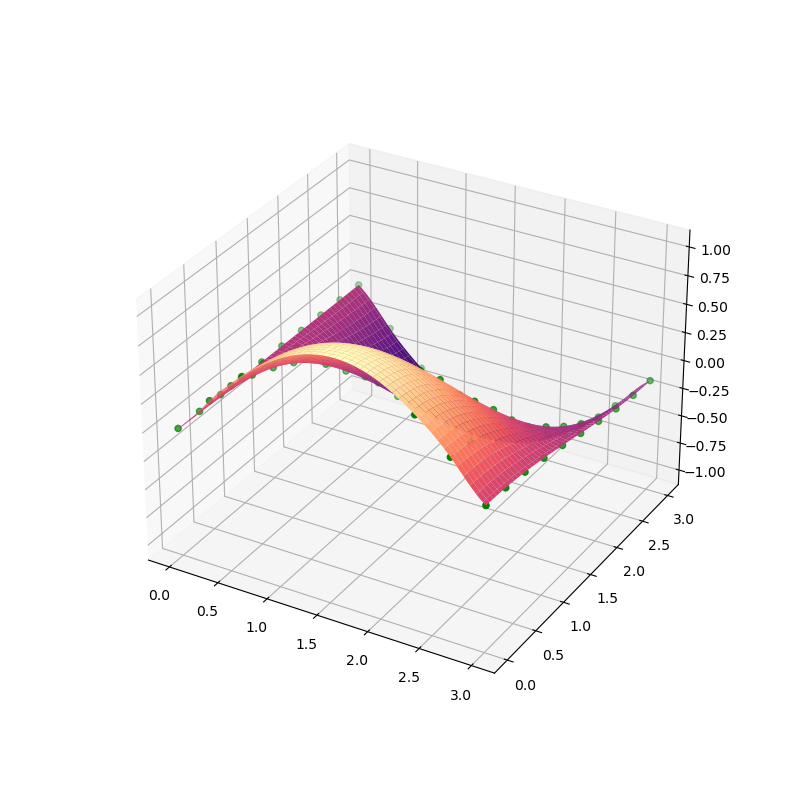

In [25]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, zz, cmap='magma')
# ax.set_zlim(0, 3)

ax.scatter(IX, IY, IZ, color="green")
plt.show()

# Biharmonic equation solution

In [100]:
x0 = 0
xN = 1

y0 = -1
yN = 1

Nx = 21
Ny = 21

X, h_1 = np.linspace(x0, xN, Nx, retstep=True)
Y, h_2 = np.linspace(y0, yN, Ny, retstep=True)

x =    np.linspace(x0, xN, 1000)
y =    np.linspace(y0, yN, 1000)
IX, IY = np.meshgrid(X, Y, indexing="xy")

n_points_x = X.shape[0]
n_points_y = Y.shape[0]

matrix = np.zeros((n_points_y * n_points_x, n_points_y * n_points_x))
b = np.zeros(n_points_y * n_points_x)
f = np.ones_like(IX)

# Computed integrals

In [101]:
x_axis_xx = np.array([3/8/h_1**3, 0, -27/8/h_1**3, 6/h_1**3, -27/8/h_1**3, 0, 3/8/h_1**3])
y_axis_xx = np.array([h_2/2240, 3/56*h_2, 1991/2240*h_2, 151/140*h_2, 1991/2240*h_2, 3/56*h_2, h_2/2240])

x_axis_xx_3 = np.array([3/8/h_1**3, 0, -27/8/h_1**3, 6/h_1**3, -27/8/h_1**3, 0, 3/8/h_1**3])
y_axis_xx_3 = np.array([h_2/2240, 3/56*h_2, 1991/2240*h_2, 151/140*h_2, 1991/2240*h_2, 3/56*h_2, h_2/2240])

x_axis_xx_2 = np.array([3/8/h_1**3, -27/8/h_1**3, 6/h_1**3, -27/8/h_1**3, 0, 3/8/h_1**3])
y_axis_xx_2 = np.array([121/2240*h_2, 1991/2240*h_2, 151/140*h_2, 1991/2240*h_2, 3/56*h_2, h_2/2240])

x_axis_xx_1 = np.array([-9/4/h_1**3, 21/4/h_1**3, -27/8/h_1**3, 0, 3/8/h_1**3])
y_axis_xx_1 = np.array([561/1120*h_2, 599/560*h_2, 1991/2240*h_2, 3/56*h_2, h_2/2240])

x_axis_xx_0 = np.array([3/2/h_1**3, -9/4/h_1**3, 3/8/h_1**3, 3/8/h_1**3])
y_axis_xx_0 = np.array([743/1120*h_2, 561/1120*h_2, 121/2240*h_2, 1/2240*h_2])

In [102]:
y_axis_yy = np.array([3/8/h_1**3, 0, -27/8/h_1**3, 6/h_1**3, -27/8/h_1**3, 0, 3/8/h_1**3])
x_axis_yy = np.array([h_2/2240, 3/56*h_2, 1991/2240*h_2, 151/140*h_2, 1991/2240*h_2, 3/56*h_2, h_2/2240])

y_axis_yy_3 = np.array([3/8/h_1**3, 0, -27/8/h_1**3, 6/h_1**3, -27/8/h_1**3, 0, 3/8/h_1**3])
x_axis_yy_3 = np.array([h_2/2240, 3/56*h_2, 1991/2240*h_2, 151/140*h_2, 1991/2240*h_2, 3/56*h_2, h_2/2240])

y_axis_yy_2 = np.array([3/8/h_1**3, -27/8/h_1**3, 6/h_1**3, -27/8/h_1**3, 0, 3/8/h_1**3])
x_axis_yy_2 = np.array([121/2240*h_2, 1991/2240*h_2, 151/140*h_2, 1991/2240*h_2, 3/56*h_2, h_2/2240])

y_axis_yy_1 = np.array([-9/4/h_1**3, 21/4/h_1**3, -27/8/h_1**3, 0, 3/8/h_1**3])
x_axis_yy_1 = np.array([561/1120*h_2, 599/560*h_2, 1991/2240*h_2, 3/56*h_2, h_2/2240])

y_axis_yy_0 = np.array([3/2/h_1**3, -9/4/h_1**3, 3/8/h_1**3, 3/8/h_1**3])
x_axis_yy_0 = np.array([743/1120*h_2, 561/1120*h_2, 121/2240*h_2, 1/2240*h_2])

In [103]:
x_axis_xy = np.array([-3/160/h_1, -9/20/h_1, -9/32/h_1, 3/2/h_1, -9/32/h_1, -9/20/h_1, -3/160/h_1])
y_axis_xy = np.array([-3/160/h_2, -9/20/h_2, -9/32/h_2, 3/2/h_2, -9/32/h_2, -9/20/h_2, -3/160/h_2])

x_axis_xy_3 = np.array([-3/160/h_1, -9/20/h_1, -9/32/h_1, 3/2/h_1, -9/32/h_1, -9/20/h_1, -3/160/h_1])
y_axis_xy_3 = np.array([-3/160/h_2, -9/20/h_2, -9/32/h_2, 3/2/h_2, -9/32/h_2, -9/20/h_2, -3/160/h_2])

x_axis_xy_2 = np.array([-15/32/h_1, -9/32/h_1, 3/2/h_1, -9/32/h_1, -9/20/h_1, -3/160/h_1])
y_axis_xy_2 = np.array([-15/20/h_2, -9/32/h_2, 3/2/h_2, -9/32/h_2, -9/20/h_2, -3/160/h_2])

x_axis_xy_1= np.array([-51/80/h_1, 111/80/h_1, -9/32/h_1, -9/20/h_1, -3/160/h_1])
y_axis_xy_1= np.array([-51/80/h_2, 111/80/h_2, -9/32/h_2, -9/20/h_2, -3/160/h_2])

x_axis_xy_0 = np.array([9/8/h_1, -51/80/h_1, -15/32/h_1, -3/160/h_1])
y_axis_xy_0 = np.array([9/8/h_2, -51/80/h_2, -15/32/h_2, -3/160/h_2])

In [124]:
for i in range(n_points_y * n_points_x):
    idx = np.unravel_index(i, (n_points_y, n_points_x))
    tmp = np.zeros((n_points_y, n_points_x))

    #Dirichlet boundary conditions
    if (idx[0] == 0) or (idx[1] == 0) or (idx[0] == n_points_y-1) or (idx[1] == n_points_x-1):
        tmp[idx] = 1

        if (idx[0] == 0): 
            tmp[idx] *= 1.25
        if (idx[1] == 0):
            tmp[idx] *= 1.25
        if (idx[0] == n_points_y-1):
            tmp[idx] *= 1.25
        if (idx[1] == n_points_x-1):
            tmp[idx] *= 1.25

        if idx[0]+1 <= n_points_y-1:
            tmp[idx[0]+1, idx[1]] = 1/4

        if idx[1]+1 <= n_points_x-1:
            tmp[idx[0], idx[1]+1] = 1/4

        if idx[0]-1 >= 0:
            tmp[idx[0]-1, idx[1]] = 1/4

        if idx[1]-1 >= 0:
            tmp[idx[0], idx[1]-1] = 1/4

        if (idx[0]+1 <= n_points_y-1) and (idx[1]+1 <= n_points_x-1):
            tmp[idx[0]+1, idx[1]+1] = 1/16

        if (idx[0]+1 <= n_points_y-1) and (idx[1]-1 >= 0):
            tmp[idx[0]+1, idx[1]-1] = 1/16

        if (idx[0]-1 >= 0) and (idx[1]-1 >= 0):
            tmp[idx[0]-1, idx[1]-1] = 1/16

        if (idx[0]-1 >= 0) and (idx[1]+1 <= n_points_x-1):
            tmp[idx[0]-1, idx[1]+1] = 1/16

        #Multiply edge line's by 1.25
        if (idx[0] == 0) or (idx[0] == n_points_y - 1):
            if idx[1] + 1 <= n_points_x - 1:
                tmp[idx[0], idx[1] + 1] *= 1.25
            if idx[1] - 1 >= 0:
                tmp[idx[0], idx[1] - 1] *= 1.25

        if (idx[1] == 0) or (idx[1] == n_points_x - 1):
            if idx[0] + 1 <= n_points_y - 1:
                tmp[idx[0] + 1, idx[1]] *= 1.25
            if idx[0] - 1 >= 0:
                tmp[idx[0] - 1, idx[1]] *= 1.25

        matrix[i] = tmp.flatten()
        b[i] = 0
        continue

    #Neuman boundary conditions
    if (idx[0] == 1) or (idx[1] == 1) or (idx[0] == n_points_y-2) or (idx[1] == n_points_x-2):
        
        if idx[0] == 1:
            if 1 <= idx[1] <= n_points_x - 2:
                tmp[0, idx[1]] = (-1) * (3/4/h_2)
                tmp[1, idx[1]] = (+1) * (3/4/h_2)
                
                tmp[0, idx[1]-1] =  (1/4) * (3/4/h_2)
                tmp[1, idx[1]-1] =  (1/4) * (3/4/h_2)
                tmp[0, idx[1]+1] =  (1/4) * (3/4/h_2)
                tmp[1, idx[1]+1] =  (1/4) * (3/4/h_2)
            else:
                tmp[0, idx[1]] = (-9/4) * (3/4/h_2)
                tmp[1, idx[1]] = (+1/4) * (3/4/h_2)
        
        if idx[0] == n_points_y - 2:
            if 1 <= idx[1] <= n_points_x - 2:
                tmp[n_points_y-1, idx[1]] = (-1) * (3/4/h_2)
                tmp[n_points_y-2, idx[1]] = (+1) * (3/4/h_2)
                
                tmp[n_points_y-1, idx[1]-1] =  (1/4) * (3/4/h_2)
                tmp[n_points_y-2, idx[1]-1] =  (1/4) * (3/4/h_2)
                tmp[n_points_y-1, idx[1]+1] =  (1/4) * (3/4/h_2)
                tmp[n_points_y-2, idx[1]+1] =  (1/4) * (3/4/h_2)
            else:
                tmp[n_points_y-1, idx[1]] = (-9/4) * (3/4/h_2)
                tmp[n_points_y-2, idx[1]] = (+1/4) * (3/4/h_2)
        
        if idx[1] == 1:
            if 1 <= idx[0] <= n_points_x - 2:
                tmp[idx[0], 0] = (-1) * (3/4/h_1)
                tmp[idx[0], 1] = (+1) * (3/4/h_1)
                
                tmp[idx[0]-1, 0] =  (1/4) * (3/4/h_1)
                tmp[idx[0]-1, 1] =  (1/4) * (3/4/h_1)
                tmp[idx[0]+1, 0] =  (1/4) * (3/4/h_1)
                tmp[idx[0]+1, 1] =  (1/4) * (3/4/h_1)
            else:
                tmp[idx[0], 0] = (-9/4) * (3/4/h_1)
                tmp[idx[0], 1] = (+1/4) * (3/4/h_1)

        if idx[1] == n_points_x - 2:
            if 1 <= idx[0] <= n_points_y - 2:
                tmp[idx[0], n_points_x-1] = (-1) * (3/4/h_1)
                tmp[idx[0], n_points_x-2] = (+1) * (3/4/h_1)

                tmp[idx[0]-1, n_points_x-1] =  (1/4) * (3/4/h_1)
                tmp[idx[0]-1, n_points_x-2] =  (1/4) * (3/4/h_1)
                tmp[idx[0]+1, n_points_x-1] =  (1/4) * (3/4/h_1)
                tmp[idx[0]+1, n_points_x-2] =  (1/4) * (3/4/h_1)
            else:
                tmp[idx[0], n_points_x-1] = (-9/4) * (3/4/h_1)
                tmp[idx[0], n_points_x-2] = (+1/4) * (3/4/h_1)

        matrix[i] = tmp.flatten()
        b[i] = 0
        continue

    #for x axis
    if idx[1] == 0:
        XX_x = x_axis_xx_0
        YY_x = x_axis_yy_0
        XY_x = x_axis_xy_0
        offset_x = 0
    elif idx[1] == 1:
        XX_x = x_axis_xx_1
        YY_x = x_axis_yy_1
        XY_x = x_axis_xy_1
        offset_x = 1
    elif idx[1] == 2:
        XX_x = x_axis_xx_2
        YY_x = x_axis_yy_2
        XY_x = x_axis_xy_2
        offset_x = 2
    elif idx[1] == 3:
        XX_x = x_axis_xx_3
        YY_x = x_axis_yy_3
        XY_x = x_axis_xy_3
        offset_x = 3
    elif idx[1] == n_points_x - 4:
        XX_x = x_axis_xx_3[::-1]
        YY_x = x_axis_yy_3[::-1]
        XY_x = x_axis_xy_3[::-1]
        offset_x = -3 + XY_x.shape[0] - 1
    elif idx[1] == n_points_x - 3:
        XX_x = x_axis_xx_2[::-1]
        YY_x = x_axis_yy_2[::-1]
        XY_x = x_axis_xy_2[::-1]
        offset_x = -2 + XY_x.shape[0] - 1
    elif idx[1] == n_points_x - 2:
        XX_x = x_axis_xx_1[::-1]
        YY_x = x_axis_yy_1[::-1]
        XY_x = x_axis_xy_1[::-1]
        offset_x = -1 + XY_x.shape[0] - 1
    elif idx[1] == n_points_x - 1:
        XX_x = x_axis_xx_0[::-1]
        YY_x = x_axis_yy_0[::-1]
        XY_x = x_axis_xy_0[::-1]
        offset_x = 0 + XY_x.shape[0] - 1
    else:
        XX_x = x_axis_xx
        YY_x = x_axis_yy
        XY_x = x_axis_xy
        offset_x = 3

    #for y axis
    if idx[0] == 0:
        XX_y = y_axis_xx_0
        YY_y = y_axis_yy_0
        XY_y = y_axis_xy_0
        offset_y = 0
    elif idx[0] == 1:
        XX_y = y_axis_xx_1
        YY_y = y_axis_yy_1
        XY_y = y_axis_xy_1
        offset_y = 1
    elif idx[0] == 2:
        XX_y = y_axis_xx_2
        YY_y = y_axis_yy_2
        XY_y = y_axis_xy_2
        offset_y = 2
    elif idx[0] == 3:
        XX_y = y_axis_xx_3
        YY_y = y_axis_yy_3
        XY_y = y_axis_xy_3
        offset_y = 3
    elif idx[0] == n_points_y - 4:
        XX_y = y_axis_xx_3[::-1]
        YY_y = y_axis_yy_3[::-1]
        XY_y = y_axis_xy_3[::-1]
        offset_y = -3 + XY_y.shape[0] - 1
    elif idx[0] == n_points_y - 3:
        XX_y = y_axis_xx_2[::-1]
        YY_y = y_axis_yy_2[::-1]
        XY_y = y_axis_xy_2[::-1]
        offset_y = -2 + XY_y.shape[0] - 1
    elif idx[0] == n_points_y - 2:
        XX_y = y_axis_xx_1[::-1]
        YY_y = y_axis_yy_1[::-1]
        XY_y = y_axis_xy_1[::-1]
        offset_y = -1 + XY_y.shape[0] - 1
    elif idx[0] == n_points_y - 1:
        XX_y = y_axis_xx_0[::-1]
        YY_y = y_axis_yy_0[::-1]
        XY_y = y_axis_xy_0[::-1]
        offset_y = 0 + XY_y.shape[0] - 1
    else:
        XX_y = y_axis_xx
        YY_y = y_axis_yy
        XY_y = y_axis_xy
        offset_y = 3
    
    first = 2 *  np.outer(XX_y, XX_x)
    second = 4 * np.outer(XY_y, XY_x)
    third = 2 *  np.outer(YY_y, YY_x)
    
    val = first + second + third
    tmp[idx[0] - offset_y: (idx[0] + first.shape[0] - offset_y), 
        idx[1] - offset_x: (idx[1] + first.shape[1] - offset_x)] = val
    
    matrix[i] = tmp.flatten()
        
    b[i] = - 2 * (f[idx[0]-1, idx[1]] + 2*f[idx[0], idx[1]] + f[idx[0]+1, idx[1]])*\
(f[idx[0], idx[1]-1] + 2*f[idx[0], idx[1]] + f[idx[0], idx[1]+1])/9*h_1*h_2
    b[i] = - 2 * 9/4*h_1*h_2

In [118]:
C = np.linalg.solve(matrix, b).reshape(n_points_y, n_points_x)

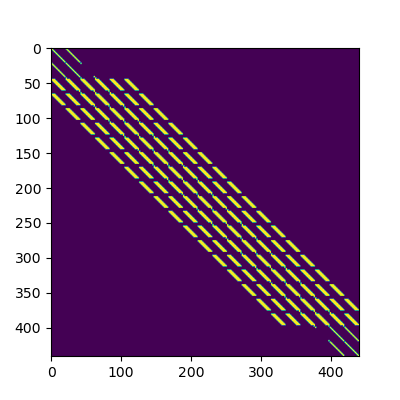

In [119]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow((matrix != 0))
plt.show()

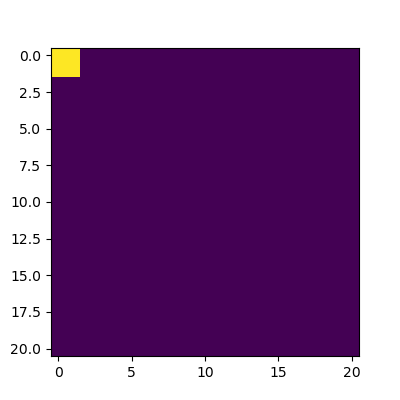

In [120]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow((matrix != 0)[0].reshape(n_points_y, n_points_x))
plt.show()

In [121]:
xx, yy = np.meshgrid(x, y, indexing="ij")
zz = np.zeros_like(xx)

In [122]:
for i in tqdm(range(IY.shape[0])):
    for j in range(IX.shape[1]):
        y_part = final_basis_normal(i, y, h_2, Ny, y0)
        x_part = final_basis_normal(j, x, h_1, Nx, x0)
        zz = zz + C[i, j] * np.outer(y_part, x_part)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:04<00:00,  4.89it/s]


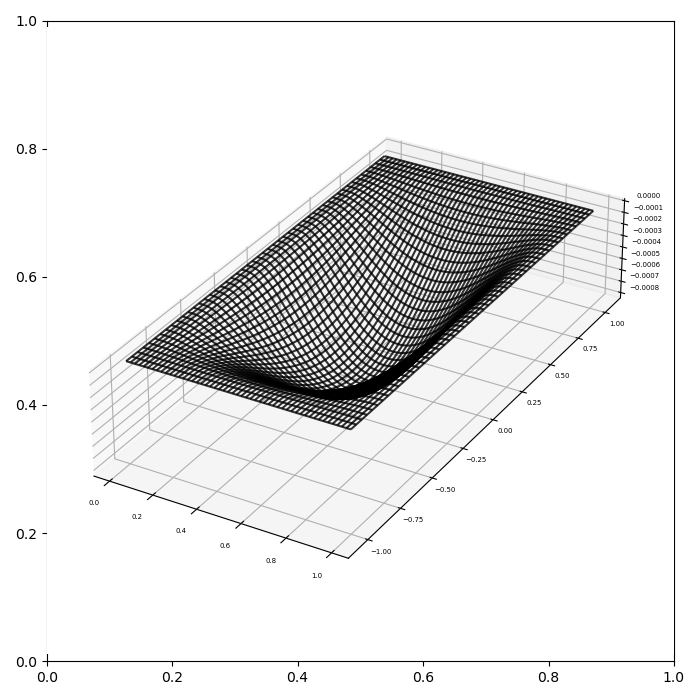

In [123]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.set_box_aspect((np.ptp(xx), np.ptp(yy), 500*np.ptp(zz)))
ax.plot_wireframe(xx, yy, zz, alpha=0.8, color="black")
fig.tight_layout()
ax.tick_params(axis='both', which='major', labelsize=5)
plt.show()

In [60]:
#fig.savefig("../images/biharmonic_equation_solution", dpi=400, transparent=True)